In [2]:
#coding:utf-8

In [1]:
import numpy as np

感知机规则

In [27]:
class Perceptron(object):
    #设置学习率eta以及学习次数epoch
    def __init__(self, eta=0.01, epochs=50):
        self.eta=eta
        self.epochs=epochs
    
    #设置学习算法
    def train(self, X, y):
        self.w_=np.zeros(X.shape[1]+1)
        self.errors_=[]
        for _ in range(self.epochs):
            errors=0
            for xi, target in zip(X,y):
                update=self.eta*(target-self.predict(xi))
                self.w_[1:]+=update*xi #这里之所以可以直接写成update*xi是因为xi本身就是一个1x2的向量，
                                       #self.w_+=update*xi表示各个维度分别加上delta w
                self.w_[0]+=update
                errors+=int(update!=0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0.0, 1, -1)
    

Weights: [-0.4  -0.68  1.82]


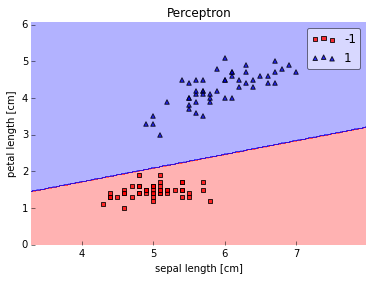

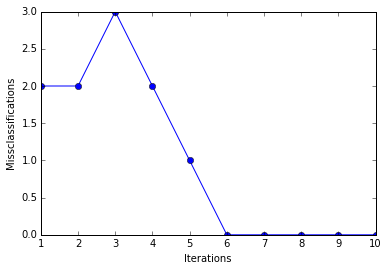

In [28]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
 
# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
 
# sepal length and petal length
X = df.iloc[0:100, [0,2]].values
 
%matplotlib inline
 
import matplotlib.pyplot as plt
from mlxtend.evaluate import plot_decision_regions
 
ppn = Perceptron(epochs=10, eta=0.1)
 
ppn.train(X, y)
print('Weights: %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()
 
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Missclassifications')
plt.show()
 


In [30]:
class AdalineGD(object):
    
    def __init__(self, eta=0.01, epochs=50):
        self.eta=eta
        self.epochs=epochs
    
    def train(self, X, y):
        self.w_=np.zeros(X.shape[1]+1)
        self.cost_=[]
        for i in range(self.epochs):
            output=self.net_input(X)
            errors=(y-output)
            self.w_[1:]+=self.eta*X.T.dot(errors)
            self.w_[0]+=self.eta*errors.sum()
            cost=(errors**2).sum()/2
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    def activation(self, X):
        return self.net_input(X)
    def predict(self, X):
        return np.where(self.activation(X)>=0.0, 1, -1)

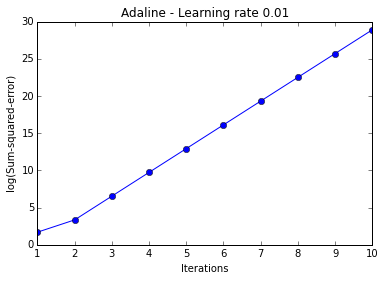

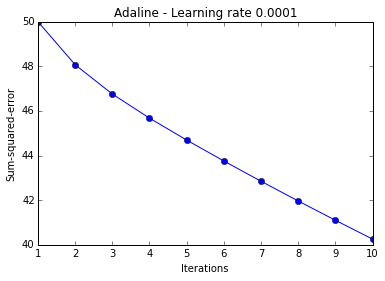

In [31]:
ada = AdalineGD(epochs=10, eta=0.01).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.01')
plt.show()
 
ada = AdalineGD(epochs=10, eta=0.0001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.0001')
plt.show()

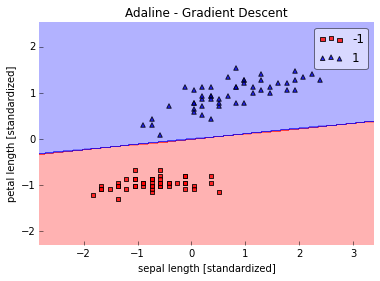

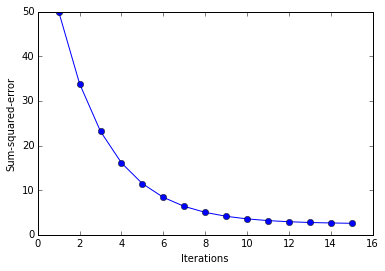

In [32]:
# standardize features
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
 
%matplotlib inline
 
import matplotlib.pyplot as plt
from mlxtend.evaluate import plot_decision_regions
 
ada = AdalineGD(epochs=15, eta=0.01)
 
ada.train(X_std, y)
plot_decision_regions(X_std, y, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()
 
plt.plot(range(1, len( ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.show()
